In [1]:
"""
    alpha, beta, sigma = linear_regression(x, y)

Least square fit y = alpha + beta x. sigma is the standard error of beta
"""
function linear_regression(x, y)
    np = length(x)
    xbar = sum(x)/np
    ybar = sum(y)/np
    x2 = sum((x .- xbar) .^ 2)
    beta = sum((y .- ybar) .* (x .- xbar))/x2
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta .* x) .^ 2)/((np - 2)*x2))
    return alpha, beta, sigma
end

#NEEDED FOR MIDTERM 2

linear_regression

In [2]:
xmin = 0.0
xmax = 10.0
np = 200
sc = 1.5
x = range(xmin, xmax, np)
y = 2 .* x .+ sc .* randn(np);

In [3]:
alpha1, beta1, sigma1 = linear_regression(x, y)

(0.28456194703533555, 1.9537264172615016, 0.03664612584291583)

In [4]:
using PyPlot

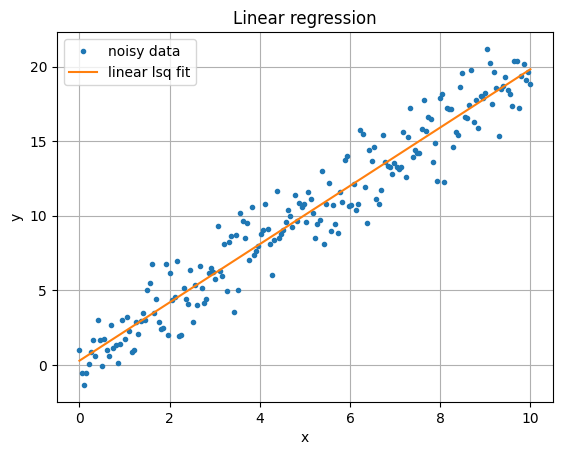

In [5]:
plot(x, y, linestyle="none", marker=".", label="noisy data")
plot(x, alpha1 .+ beta1 .* x, linestyle="solid", label="linear lsq fit")

grid(true)
xlabel("x")
ylabel("y")
title("Linear regression")
legend();

# Bouncing Ball

In [6]:
using OrdinaryDiffEqTsit5
using PyPlot

In [7]:
#RHS of ODE
function bouncingball!(dudtau, u, G, tau)
    dudtau[1] = u[2]
    dudtau[2] = -G
    return nothing
end

bouncingball! (generic function with 1 method)

In [8]:
function condition(u, t, integrator)
  u[1] - sin(t)
end

condition (generic function with 1 method)

In [9]:
function affect!(integrator)
    integrator.u[2] = -integrator.u[2] + 2*cos(integrator.t)
end

affect! (generic function with 1 method)

In [10]:

cb = ContinuousCallback(condition, affect!);

In [11]:

u0 = [0.0001, 0.0]
G = 1.0
tspan = (0.0, 100.0);

In [12]:
prob = ODEProblem(bouncingball!, u0, tspan, G)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 0.0001
 0.0

In [13]:
sol = solve(prob, Tsit5(), callback=cb, dtmax=0.1);

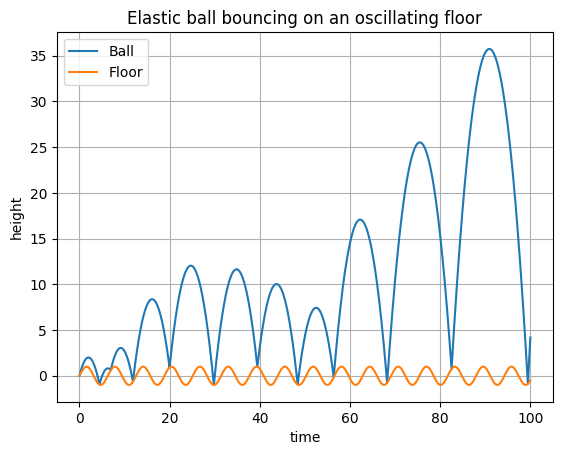

In [14]:

plot(sol.t, sol[1,:], label="Ball")
plot(sol.t, sin.(sol.t), label="Floor")
grid(true)
xlabel("time")
ylabel("height")
legend()
title("Elastic ball bouncing on an oscillating floor");

In [15]:

function energy(sol, G)
    G * sol[1, :] .+ 0.5 .* (sol[2, :]) .^ 2
end

energy (generic function with 1 method)

In [16]:
en = energy(sol, G);

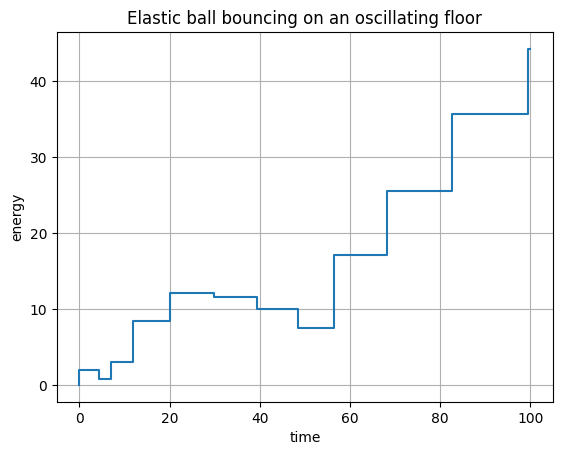

In [17]:

plot(sol.t, en)
grid(true)
xlabel("time")
ylabel("energy")
title("Elastic ball bouncing on an oscillating floor");

# Hubble

In [18]:
#] add CSV
using CSV

In [19]:
#] add DataFrames
using DataFrames
using PyPlot

In [26]:

url = "https://vizier.u-strasbg.fr/viz-bin/asu-txt?-source=J/ApJ/716/712/tableb2&-out=SN&-out=zCMB&-out=mu"

"https://vizier.u-strasbg.fr/viz-bin/asu-txt?-source=J/ApJ/716/712/tableb2&-out=SN&-out=zCMB&-out=mu"

In [27]:
catalog = download(url);

LoadError: RequestError: SSL connection timeout while requesting https://vizier.u-strasbg.fr/viz-bin/asu-txt?-source=J/ApJ/716/712/tableb2&-out=SN&-out=zCMB&-out=mu

In [25]:

df = CSV.read(catalog, DataFrame, skipto=38, delim=' ', ignorerepeated=true,
              types=[String, Float64, Float64], silencewarnings=true,
              header=["name", "redshift", "modulus"],)

LoadError: UndefVarError: `catalog` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [28]:
dropmissing!(df)

LoadError: UndefVarError: `df` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [29]:
dist(modulus) = 10.0 ^ (modulus / 5 - 5)

dist (generic function with 1 method)

In [30]:

filter!(row -> row.redshift < 0.04, df);

LoadError: UndefVarError: `df` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [31]:

sort!(df, "modulus");

LoadError: UndefVarError: `df` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [32]:
distances = dist.(df.modulus);

LoadError: UndefVarError: `df` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [33]:

plot(distances, df.redshift, ".", label="measurements")
grid(true)
legend()
ylabel("Red Shift")
xlabel("Distance (Mpc)");

LoadError: UndefVarError: `distances` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [34]:

"""
   alpha, beta, sigma = linear_regression(x, y)

Least square linear regression fit y = alpha + beta * x
Sigma is standard deviation for beta
"""
function linear_regression(x, y)
    n = length(x)
    xbar = sum(x)/n
    ybar = sum(y)/n
    denom = sum((x .- xbar).^2)
    beta = sum((x .- xbar).*(y .- ybar))/denom
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta*x).^2)/((n - 2)*denom))
    return alpha, beta, sigma
end

linear_regression

In [35]:

alpha, beta, sigma = linear_regression(distances, df.redshift)

LoadError: UndefVarError: `distances` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:

plot(distances, df.redshift, ".", label="measurements")
plot(distances, alpha .+ beta*distances, label="LSq linear fit")
grid(true)
legend()
ylabel("Red Shift")
xlabel("Distance (Mpc)");

LoadError: UndefVarError: `distances` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:

const c = 300000.0  # speed of light, km/sec
H0 = c * beta
round(H0, digits=3)

LoadError: UndefVarError: `beta` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [38]:

dH0 = c * sigma

LoadError: UndefVarError: `sigma` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [39]:

const mpc = 3.09e19     # 1 megaparsec in km
h0 = H0 / mpc
round(h0, sigdigits=3)

LoadError: UndefVarError: `H0` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [40]:

Th = 1 / h0
round(Th, sigdigits=3)

LoadError: UndefVarError: `h0` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [41]:

round(Th/(60*60*24*365), sigdigits=2)

LoadError: UndefVarError: `Th` not defined in `Main`
Suggestion: check for spelling errors or missing imports.